<a href="https://colab.research.google.com/github/Utpal-Mishra/Python-Temperature-Prediction/blob/main/TemperaturePredictionIntegratedModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT LIBRARIES

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

#IMPORT DATA

In [ ]:
from google.colab import drive
drive.mount('/content/Drive/')

Drive already mounted at /content/Drive/; to attempt to forcibly remount, call drive.mount("/content/Drive/", force_remount=True).


In [ ]:
path = '/content/Drive/My Drive/Temperature Prediction/Bias_correction_ucl.csv'
data = pd.read_csv(path)
data.head()

,Station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233948,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.8960,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.3125,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204092,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.5557,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.9648,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.5522,31.2,22.5


In [ ]:
print("Data.shape:", data.shape)

Data.shape: (7752, 25)


In [ ]:
import datetime as dt
data['Date'] = pd.to_datetime(data['Date'])
data['Date']= data['Date'].map(dt.datetime.toordinal)
data.head()

,Station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233948,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.8960,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.3125,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204092,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.5557,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.9648,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.5522,31.2,22.5


In [ ]:
print(data.isnull().sum().sum())
data.fillna(value = 0, inplace = True)
print(data.isnull().sum().sum())

1246
0


In [ ]:
print(np.any(np.isnan(data)))
print(np.all(np.isfinite(data)))

False
True


In [ ]:
data['Present_Tmax'].apply(lambda x: '{:.1f}'.format(x))
data['Present_Tmin'].apply(lambda x: '{:.1f}'.format(x))
data['LDAPS_RHmin'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_RHmax'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_Tmax_lapse'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_Tmin_lapse'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_WS'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_LH'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_CC1'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_CC2'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_CC3'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_CC4'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_PPT1'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_PPT2'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_PPT3'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_PPT4'].apply(lambda x: '{:.7f}'.format(x))
data['lat'].apply(lambda x: '{:.4f}'.format(x))
data['lon'].apply(lambda x: '{:.3f}'.format(x))
data['DEM'].apply(lambda x: '{:.4f}'.format(x))
data['Slope'].apply(lambda x: '{:.4f}'.format(x))
data['Solar radiation'].apply(lambda x: '{:.4f}'.format(x))
data['Next_Tmax'].apply(lambda x: '{:.1f}'.format(x))
data['Next_Tmin'].apply(lambda x: '{:.1f}'.format(x))

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7747    18.1
7748    18.8
7749    17.4
7750    11.3
7751    29.8
Name: Next_Tmin, Length: 7752, dtype: object

In [ ]:
print(np.any(np.isnan(data)))
print(np.all(np.isfinite(data)))

False
True


#VISUALIZATION

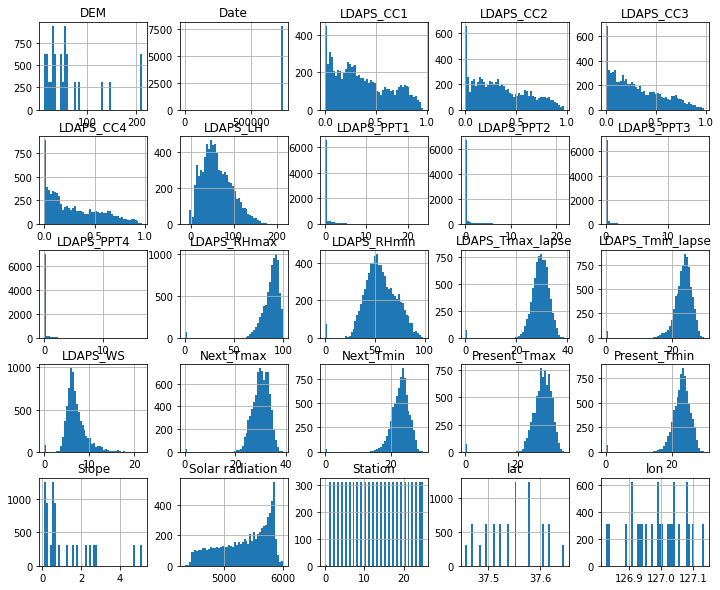

In [ ]:
data.hist(figsize = (12,10), bins = 50)
plt.show()

#CREATING MODEL: CALCULATING NEXT_Tmax

#MODEL TRAINING

In [ ]:
X = data.drop(['Next_Tmax', 'Next_Tmin'] , axis=1).values
Y = data['Next_Tmax'].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print("X_train.shape:", X_train.shape, "X_test.shape:", X_test.shape, "Y_train.shape:", Y_train.shape, "Y_test.shape:", Y_test.shape)

X_train.shape: (6201, 23) X_test.shape: (1551, 23) Y_train.shape: (6201,) Y_test.shape: (1551,)


In [ ]:
REGRESSOR = ['LINEAR REGRESSION','RIDGE REGRESSION','RIDGE COMPLEXITY','LASSO REGRESSION','LARS LASSO REGRESSION','BAYESIAN RIDGE REGRESSION','SVM', 'GRADIENT BOOSTING REGRESSION',
             'DECISION TREE','RANDOM FOREST','ADABOOST','GRADIENT DESCENT REGRESSION','VOTING REGRESSION','XGBOOST']
TRAIN_ACCURACY = []
VARIANCE_SCORE = []
MAX_ERROR = []
ABSOLUTE_ERROR = []
MEAN_SQUARED_ERROR = []
MEDIAN_ABSOLUTE_ERROR = []
R_SQUARE_SCORE = []

#LINEAR REGRESSION

In [ ]:
from sklearn import linear_model, metrics

LR = linear_model.LinearRegression(normalize=True)

LR.fit(X_train, Y_train)
LR_pred = LR.predict(X_test)
print ('Coefficients: ', LR.coef_)
print ('Intercept: ', LR.intercept_)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", LR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,LR_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test,LR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test,LR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test,LR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test,LR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test,LR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test,LR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test,LR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test,LR_pred))

Coefficients:  [ 1.77981849e-02 -4.56152077e-06  1.04363043e-01  1.59552507e-01
  8.33688482e-03 -9.96592143e-02  2.53931083e-01  1.51334887e-01
 -2.73789154e-01  8.78506546e-03 -1.19629595e+00 -8.01055265e-01
 -2.12693591e+00 -1.17948056e+00  7.40710581e-02  1.42775334e-01
  4.22164088e-02  6.39965121e-02  1.86934040e+00 -1.23677614e+00
 -4.44567354e-03  2.77593939e-01  6.84421209e-04]
Intercept:  109.96846866253253

REGRESSION REPORT:

TRAINING ACCURACY:	 0.5611829341045413
VARIANCE SCORE:		 0.5282191740288514
MAX ERROR:		 30.357736688779468
ABSOLUTE ERROR:		 1.444948817540158
MEAN SQUARED ERROR:	 6.1688193903739235
MEDIAN ABSOLUTE ERROR:   1.0284123505652865
R-SQUARE SCORE:  	 0.5276614280358648


In [ ]:
TRAIN_ACCURACY.append(LR.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,LR_pred))
MAX_ERROR.append(metrics.max_error(Y_test,LR_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test,LR_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test,LR_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test,LR_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test,LR_pred))

#RIDGE REGRESSION

In [ ]:
from sklearn import linear_model, metrics

RR = linear_model.Ridge(alpha=.5)
RR.fit(X_train, Y_train)
RR_pred = RR.predict(X_test)
print ('Coefficients: ', RR.coef_)
print ('Intercept: ', RR.intercept_)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", RR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,RR_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test,RR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test,RR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test,RR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test,RR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test,RR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test,RR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test,RR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test,RR_pred))

Coefficients:  [ 1.77172118e-02 -4.57257418e-06  1.04353617e-01  1.59617073e-01
  8.33991151e-03 -9.96332120e-02  2.54068432e-01  1.51048893e-01
 -2.73728376e-01  8.79739546e-03 -1.19478492e+00 -8.03783031e-01
 -2.12006004e+00 -1.18138928e+00  7.39843313e-02  1.42741618e-01
  4.20217773e-02  6.37008643e-02  1.79458170e+00 -1.20942795e+00
 -4.45290749e-03  2.77816040e-01  6.84713062e-04]
Intercept:  109.30685001482793

REGRESSION REPORT:

TRAINING ACCURACY:	 0.5611818138891891
VARIANCE SCORE:		 0.5282447662326856
MAX ERROR:		 30.352073876960475
ABSOLUTE ERROR:		 1.444903221768495
MEAN SQUARED ERROR:	 6.168472454827381
MEDIAN ABSOLUTE ERROR:   1.0260637281395368
R-SQUARE SCORE:  	 0.5276879924447488


In [ ]:
TRAIN_ACCURACY.append(RR.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,RR_pred))
MAX_ERROR.append(metrics.max_error(Y_test,RR_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test,RR_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test,RR_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test,RR_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test,RR_pred))

#RIDGE COMPLEXITY

In [ ]:
from sklearn import linear_model, metrics

RC = linear_model.RidgeCV()
RC.fit(X_train, Y_train)
RC_pred = RC.predict(X_test)
print ('Coefficients: ', RC.coef_)
print ('Intercept: ', RC.intercept_)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", RC.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,RC_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test,RC_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test,RC_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test,RC_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test,RC_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test,RC_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test,RC_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test,RC_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test,RC_pred))

Coefficients:  [ 1.69062667e-02 -4.73740911e-06  1.03856831e-01  1.60882042e-01
  7.81823530e-03 -9.93413233e-02  2.56300471e-01  1.47686491e-01
 -2.73279800e-01  8.99898150e-03 -1.16100065e+00 -8.37810829e-01
 -1.99379669e+00 -1.20693283e+00  7.24969825e-02  1.42030409e-01
  3.82926863e-02  5.91783210e-02  1.01527506e+00 -8.85627462e-01
 -4.51008849e-03  2.80362380e-01  6.87301823e-04]
Intercept:  97.52132898433099

REGRESSION REPORT:

TRAINING ACCURACY:	 0.5610053128629973
VARIANCE SCORE:		 0.5284012427841376
MAX ERROR:		 30.28067193354366
ABSOLUTE ERROR:		 1.4451544075334462
MEAN SQUARED ERROR:	 6.1662708696207424
MEDIAN ABSOLUTE ERROR:   1.0321980649668703
R-SQUARE SCORE:  	 0.5278565649943332


In [ ]:
TRAIN_ACCURACY.append(RC.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,RC_pred))
MAX_ERROR.append(metrics.max_error(Y_test,RC_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test,RC_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test,RC_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test,RC_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test,RC_pred))

#LASSO REGRESSION

In [ ]:
from sklearn import linear_model, metrics

LassoR = linear_model.Lasso(alpha=0.1)
LassoR.fit(X_train, Y_train)
LassoR_pred = LassoR.predict(X_test)
print ('Coefficients: ', LassoR.coef_)
print ('Intercept: ', LassoR.intercept_)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", LassoR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,LassoR_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test, LassoR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, LassoR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, LassoR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test, LassoR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test, LassoR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, LassoR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, LassoR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test,LassoR_pred))

Coefficients:  [ 1.61545883e-02 -8.58350893e-06  9.10642157e-02  1.97059951e-01
 -3.19754930e-02 -9.43094243e-02  3.44441819e-01  6.49826015e-02
 -2.81514130e-01  1.40138378e-02 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -4.25048436e-02  7.04422510e-03  4.26956284e-02
 -0.00000000e+00 -1.52391821e-02  0.00000000e+00 -0.00000000e+00
 -1.03035811e-03  1.85753968e-01  6.43025627e-04]
Intercept:  25.0057160520104

REGRESSION REPORT:

TRAINING ACCURACY:	 0.5248618650560941
VARIANCE SCORE:		 0.49107500740048227
MAX ERROR:		 29.35880325355863
ABSOLUTE ERROR:		 1.5652688483944242
MEAN SQUARED ERROR:	 6.654853964451693
MEDIAN ABSOLUTE ERROR:   1.1340858132325096
R-SQUARE SCORE:  	 0.49044638539685914


In [ ]:
TRAIN_ACCURACY.append(LassoR.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,LassoR_pred))
MAX_ERROR.append(metrics.max_error(Y_test, LassoR_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test, LassoR_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test, LassoR_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test, LassoR_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test, LassoR_pred))

#LARS LASSO REGRESSION

In [ ]:
from sklearn import linear_model, metrics

LARSLassoR = linear_model.LassoLars(alpha=0.1)
LARSLassoR.fit(X_train, Y_train)
LARSLassoR_pred = LARSLassoR.predict(X_test)
print ('Coefficients: ', LARSLassoR.coef_)
print ('Intercept: ', LARSLassoR.intercept_)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", LARSLassoR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,LARSLassoR_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test, LARSLassoR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, LARSLassoR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, LARSLassoR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test, LARSLassoR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test, LARSLassoR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, LARSLassoR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, LARSLassoR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test,LARSLassoR_pred))

Coefficients:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Intercept:  30.187260119335594

REGRESSION REPORT:

TRAINING ACCURACY:	 0.0
VARIANCE SCORE:		 1.1102230246251565e-16
MAX ERROR:		 30.187260119335594
ABSOLUTE ERROR:		 2.600940895641819
MEAN SQUARED ERROR:	 13.068097021313813
MEDIAN ABSOLUTE ERROR:   2.112739880664403
R-SQUARE SCORE:  	 -0.0006073925535994285


In [ ]:
TRAIN_ACCURACY.append(LARSLassoR.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,LARSLassoR_pred))
MAX_ERROR.append(metrics.max_error(Y_test, LARSLassoR_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test, LARSLassoR_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test, LARSLassoR_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test, LARSLassoR_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test, LARSLassoR_pred))

#BAYESIAN RIDGE REGRESSION


In [ ]:
from sklearn import linear_model, metrics

BRR = linear_model.BayesianRidge()
BRR.fit(X_train, Y_train)
BRR_pred = BRR.predict(X_test)
print ('Coefficients: ', BRR.coef_)
print ('Intercept: ', BRR.intercept_)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", BRR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test, BRR_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test, BRR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, BRR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, BRR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test, BRR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test, BRR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, BRR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, BRR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test, BRR_pred))

Coefficients:  [ 1.67631062e-02 -4.79093146e-06  1.03613496e-01  1.61352368e-01
  7.49059681e-03 -9.92790216e-02  2.57080219e-01  1.46861861e-01
 -2.73283364e-01  9.06734539e-03 -1.14752880e+00 -8.44838716e-01
 -1.94973030e+00 -1.21249656e+00  7.19740475e-02  1.41712674e-01
  3.69174729e-02  5.77190427e-02  8.68979866e-01 -8.11994897e-01
 -4.51351357e-03  2.80956145e-01  6.87580423e-04]
Intercept:  93.69038731278778

REGRESSION REPORT:

TRAINING ACCURACY:	 0.5609201621612501
VARIANCE SCORE:		 0.5283915688328625
MAX ERROR:		 30.262292858236258
ABSOLUTE ERROR:		 1.4453129058852565
MEAN SQUARED ERROR:	 6.16635886151596
MEDIAN ABSOLUTE ERROR:   1.0358398978159862
R-SQUARE SCORE:  	 0.5278498275680119


In [ ]:
TRAIN_ACCURACY.append(BRR.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test, BRR_pred))
MAX_ERROR.append(metrics.max_error(Y_test, BRR_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test, BRR_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test, BRR_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test, BRR_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test, BRR_pred))

#SVM

In [ ]:
from sklearn.svm import SVR
SVM = SVR(kernel='rbf')
SVM.fit(X_train, Y_train)

SVM_pred = SVM.predict(X_test)
#print ('Coefficients: ', SVM.coef_)
#print ('Intercept: ', SVM.intercept_)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", SVM.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,SVM_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test, SVM_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, SVM_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, SVM_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test, SVM_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test, SVM_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, SVM_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, SVM_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test, SVM_pred))


REGRESSION REPORT:

TRAINING ACCURACY:	 -0.00736396932758976
VARIANCE SCORE:		 -0.0014401289409686768
MAX ERROR:		 30.500071790350926
ABSOLUTE ERROR:		 2.6012314507770657
MEAN SQUARED ERROR:	 13.240900536483226
MEDIAN ABSOLUTE ERROR:   2.1002103540464354
R-SQUARE SCORE:  	 -0.013838735606513053


In [ ]:
TRAIN_ACCURACY.append(SVM.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,SVM_pred))
MAX_ERROR.append(metrics.max_error(Y_test, SVM_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test, SVM_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test, SVM_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test, SVM_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test, SVM_pred))

#GRADIENT BOOSTING REGRESSION

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import sklearn.metrics

GBR = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls').fit(X_train, Y_train)
#print("MEAN SQUARE ERROR: ", metrics.mean_squared_error(Y_test, GBR.predict(X_test)))
GBR_PRED = GBR.predict(X_test)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", GBR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,RR_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test,RR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test,RR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test,RR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test,RR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test,RR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test,RR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test,RR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test,RR_pred))


REGRESSION REPORT:

TRAINING ACCURACY:	 0.6008756145052999
VARIANCE SCORE:		 0.5282447662326856
MAX ERROR:		 30.352073876960475
ABSOLUTE ERROR:		 1.444903221768495
MEAN SQUARED ERROR:	 6.168472454827381
MEDIAN ABSOLUTE ERROR:   1.0260637281395368
R-SQUARE SCORE:  	 0.5276879924447488


In [ ]:
TRAIN_ACCURACY.append(GBR.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,RR_pred))
MAX_ERROR.append(metrics.max_error(Y_test,RR_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test,RR_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test,RR_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test,RR_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test,RR_pred))

#DECISiON TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train, Y_train)
DT_pred = DT.predict(X_test)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", DT.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,DT_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test, DT_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, DT_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, DT_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test,DT_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test,DT_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, DT_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, DT_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test, DT_pred))


REGRESSION REPORT:

TRAINING ACCURACY:	 1.0
VARIANCE SCORE:		 0.27422126148287707
MAX ERROR:		 33.8
ABSOLUTE ERROR:		 1.2836234687298516
MEAN SQUARED ERROR:	 9.478858800773693
MEDIAN ABSOLUTE ERROR:   0.6999999999999993
R-SQUARE SCORE:  	 0.2742159647608464


In [ ]:
TRAIN_ACCURACY.append(DT.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,DT_pred))
MAX_ERROR.append(metrics.max_error(Y_test, DT_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test, DT_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test, DT_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test,DT_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test, DT_pred))

#RANDOM FOREST

In [ ]:
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(X_train, Y_train)
RF_pred = RF.predict(X_test)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", RF.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,RF_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test, RF_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, RF_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, RF_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test, RF_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test, RF_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, RF_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, RF_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test, RF_pred))


REGRESSION REPORT:

TRAINING ACCURACY:	 0.9553649564196811
VARIANCE SCORE:		 0.6696511389240182
MAX ERROR:		 31.682000000000002
ABSOLUTE ERROR:		 0.8829935525467437
MEAN SQUARED ERROR:	 4.314412669890393
MEDIAN ABSOLUTE ERROR:   0.5629999999999882
R-SQUARE SCORE:  	 0.6696509671623772


In [ ]:
TRAIN_ACCURACY.append(RF.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,RF_pred))
MAX_ERROR.append(metrics.max_error(Y_test, RF_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test, RF_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test, RF_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test, RF_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test, RF_pred))

#ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

ABR = AdaBoostRegressor(random_state=0, n_estimators=100)
ABR.fit(X_train, Y_train)
ABR_pred = ABR.predict(X_test)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", ABR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,ABR_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test, ABR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, ABR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, ABR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test, ABR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test, ABR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, ABR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, ABR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test, ABR_pred))


REGRESSION REPORT:

TRAINING ACCURACY:	 0.5348592536358747
VARIANCE SCORE:		 0.4067486000198183
MAX ERROR:		 29.44347826086956
ABSOLUTE ERROR:		 1.8937321129973024
MEAN SQUARED ERROR:	 8.2253959174376
MEDIAN ABSOLUTE ERROR:   1.5002390914524852
R-SQUARE SCORE:  	 0.37019200666748586


In [ ]:
TRAIN_ACCURACY.append(ABR.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,ABR_pred))
MAX_ERROR.append(metrics.max_error(Y_test, ABR_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test, ABR_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test, ABR_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test, ABR_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test, ABR_pred))

#GRADIENT DESCENT REGRESSION

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

GDR = GradientBoostingRegressor(random_state=0, n_estimators=100)
GDR.fit(X_train, Y_train)
GDR_pred = GDR.predict(X_test)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", GDR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,GDR_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test, GDR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, GDR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, GDR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test, GDR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test, GDR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, GDR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, GDR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test, GDR_pred))


REGRESSION REPORT:

TRAINING ACCURACY:	 0.7699272644738339
VARIANCE SCORE:		 0.6315449669490509
MAX ERROR:		 30.436805137908383
ABSOLUTE ERROR:		 1.1065966287391138
MEAN SQUARED ERROR:	 4.815439636503297
MEDIAN ABSOLUTE ERROR:   0.7706223315991956
R-SQUARE SCORE:  	 0.6312879762966133


In [ ]:
TRAIN_ACCURACY.append(GDR.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,GDR_pred))
MAX_ERROR.append(metrics.max_error(Y_test, GDR_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test, GDR_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test, GDR_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test, GDR_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test, GDR_pred))

#VOTING REGRESSION

In [ ]:
from sklearn.ensemble import VotingRegressor

VR = VotingRegressor([('LinearR', LR),('RandomFR', RF)])
VR.fit(X_train, Y_train)
VR_pred = VR.predict(X_test)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", VR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,VR_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test, VR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, VR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, VR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test, VR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test, VR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, VR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, VR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test, VR_pred))


REGRESSION REPORT:

TRAINING ACCURACY:	 0.8218673793624592
VARIANCE SCORE:		 0.636188783284797
MAX ERROR:		 30.971868344389748
ABSOLUTE ERROR:		 1.1029908179799535
MEAN SQUARED ERROR:	 4.753545593586142
MEDIAN ABSOLUTE ERROR:   0.7570872782158702
R-SQUARE SCORE:  	 0.636027123610635


In [ ]:
TRAIN_ACCURACY.append(VR.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,VR_pred))
MAX_ERROR.append(metrics.max_error(Y_test, VR_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test, VR_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test, VR_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test, VR_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test, VR_pred))

#XGBOOST

In [ ]:
import xgboost

XGB = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
XGB.fit(X_train, Y_train)
XGB_pred = XGB.predict(X_test)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", XGB.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test, XGB_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test, XGB_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, XGB_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, XGB_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test, XGB_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, XGB_pred))

[16:38:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

REGRESSION REPORT:

TRAINING ACCURACY:	 0.9981668823121147
VARIANCE SCORE:		 0.7020614526831841
MAX ERROR:		 31.869909286499023
ABSOLUTE ERROR:		 0.7751293556218297
MEAN SQUARED ERROR:	 3.891130026728856
MEDIAN ABSOLUTE ERROR:   0.49808311462402344
R-SQUARE SCORE:  	 0.7020611751059114


In [ ]:
TRAIN_ACCURACY.append(XGB.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test, XGB_pred))
MAX_ERROR.append(metrics.max_error(Y_test, XGB_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test, XGB_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test, XGB_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test, XGB_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test, XGB_pred))

#PERFORMANCE EVALUATION

In [ ]:
PERFORMANCE = pd.DataFrame({
'REGRESSOR' : REGRESSOR,
'ACCURACY %' : TRAIN_ACCURACY,
'VARIANCE SCORE' : VARIANCE_SCORE,
'MAX ERROR' : MAX_ERROR,
'ABSOLUTE ERROR' : ABSOLUTE_ERROR,
'MEAN SQUARED ERROR' : MEAN_SQUARED_ERROR,
'MEDIAN ABSOLUTE ERROR' : MEDIAN_ABSOLUTE_ERROR,
'R-SQUARE SCORE' : R_SQUARE_SCORE })

PERFORMANCE

,REGRESSOR,ACCURACY %,VARIANCE SCORE,MAX ERROR,ABSOLUTE ERROR,MEAN SQUARED ERROR,MEDIAN ABSOLUTE ERROR,R-SQUARE SCORE
0,LINEAR REGRESSION,0.561183,5.282192e-01,30.357737,1.444949,6.168819,1.028412,0.527661
1,RIDGE REGRESSION,0.561182,5.282448e-01,30.352074,1.444903,6.168472,1.026064,0.527688
2,RIDGE COMPLEXITY,0.561005,5.284012e-01,30.280672,1.445154,6.166271,1.032198,0.527857
3,LASSO REGRESSION,0.524862,4.910750e-01,29.358803,1.565269,6.654854,1.134086,0.490446
4,LARS LASSO REGRESSION,0.000000,1.110223e-16,30.187260,2.600941,13.068097,2.112740,-0.000607
5,BAYESIAN RIDGE REGRESSION,0.560920,5.283916e-01,30.262293,1.445313,6.166359,1.035840,0.527850
6,SVM,-0.007364,-1.440129e-03,30.500072,2.601231,13.240901,2.100210,-0.013839
7,GRADIENT BOOSTING REGRESSION,0.600876,5.282448e-01,30.352074,1.444903,6.168472,1.026064,0.527688
8,DECISION TREE,1.000000,2.742213e-01,33.800000,1.283623,9.478859,0.700000,0.274216
9,RANDOM FOREST,0.955365,6.696511e-01,31.682000,0.882994,4.314413,0.563000,0.669651


********************************************************************************

#INTEGRATING MODEL: CALCULATING NEXT_Tmin

#MODEL TRAINING

In [ ]:
X = data.drop(['Next_Tmin'] , axis=1).values
Y = data['Next_Tmin'].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print("X_train.shape:", X_train.shape, "X_test.shape:", X_test.shape, "Y_train.shape:", Y_train.shape, "Y_test.shape:", Y_test.shape)

X_train.shape: (6201, 24) X_test.shape: (1551, 24) Y_train.shape: (6201,) Y_test.shape: (1551,)


In [ ]:
REGRESSOR = ['LINEAR REGRESSION','RIDGE REGRESSION','RIDGE COMPLEXITY','LASSO REGRESSION','LARS LASSO REGRESSION','BAYESIAN RIDGE REGRESSION','SVM', 'GRADIENT BOOSTING REGRESSION',
             'DECISION TREE','RANDOM FOREST','ADABOOST','GRADIENT DESCENT REGRESSION','VOTING REGRESSION','XGBOOST']
TRAIN_ACCURACY = []
VARIANCE_SCORE = []
MAX_ERROR = []
ABSOLUTE_ERROR = []
MEAN_SQUARED_ERROR = []
MEDIAN_ABSOLUTE_ERROR = []
R_SQUARE_SCORE = []

#LINEAR REGRESSION

In [ ]:
from sklearn import linear_model, metrics

LR = linear_model.LinearRegression(normalize=True)

LR.fit(X_train, Y_train)
LR_pred = LR.predict(X_test)
print ('Coefficients: ', LR.coef_)
print ('Intercept: ', LR.intercept_)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", LR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,LR_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test,LR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test,LR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test,LR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test,LR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test,LR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test,LR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test,LR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test,LR_pred))

Coefficients:  [-1.47721510e-02  1.75719099e-06 -1.14400866e-01  2.33159477e-01
 -4.42013948e-03 -3.10594156e-02 -4.09733283e-01  6.65703021e-01
  7.99843992e-02 -1.41809398e-03  1.31491648e-01  8.42326295e-01
 -1.72200031e-01  6.21557509e-01 -4.58800350e-03 -1.04417873e-01
  8.18417063e-02 -4.87000176e-02  3.64963098e-01  5.79740064e-01
 -6.30541756e-03  1.97492664e-01  1.55735081e-04  5.93283661e-01]
Intercept:  -87.57666244288498

REGRESSION REPORT:

TRAINING ACCURACY:	 0.8233827214245133
VARIANCE SCORE:		 0.8000410542186709
MAX ERROR:		 6.459227551075131
ABSOLUTE ERROR:		 0.9236458785884161
MEAN SQUARED ERROR:	 1.4704144727936916
MEDIAN ABSOLUTE ERROR:   0.7418603205498044
R-SQUARE SCORE:  	 0.800039601101431


In [ ]:
TRAIN_ACCURACY.append(LR.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,LR_pred))
MAX_ERROR.append(metrics.max_error(Y_test,LR_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test,LR_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test,LR_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test,LR_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test,LR_pred))

#RIDGE REGRESSION

In [ ]:
from sklearn import linear_model, metrics

RR = linear_model.Ridge(alpha=.5)
RR.fit(X_train, Y_train)
RR_pred = RR.predict(X_test)
print ('Coefficients: ', RR.coef_)
print ('Intercept: ', RR.intercept_)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", RR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,RR_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test,RR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test,RR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test,RR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test,RR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test,RR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test,RR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test,RR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test,RR_pred))

Coefficients:  [-1.47958297e-02  1.76026891e-06 -1.14389460e-01  2.33164781e-01
 -4.39911311e-03 -3.10557983e-02 -4.09654628e-01  6.65592990e-01
  7.99736180e-02 -1.42074241e-03  1.33102716e-01  8.37166407e-01
 -1.67216402e-01  6.18132634e-01 -4.60783055e-03 -1.04269949e-01
  8.17786951e-02 -4.86260269e-02  3.54614938e-01  5.73505573e-01
 -6.30772501e-03  1.97532371e-01  1.55791843e-04  5.93254460e-01]
Intercept:  -86.39855460776656

REGRESSION REPORT:

TRAINING ACCURACY:	 0.8233825783864637
VARIANCE SCORE:		 0.8000395584246268
MAX ERROR:		 6.461516388471239
ABSOLUTE ERROR:		 0.9236535411686961
MEAN SQUARED ERROR:	 1.4704253875950872
MEDIAN ABSOLUTE ERROR:   0.7414055093706509
R-SQUARE SCORE:  	 0.8000381168069811


In [ ]:
TRAIN_ACCURACY.append(RR.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,RR_pred))
MAX_ERROR.append(metrics.max_error(Y_test,RR_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test,RR_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test,RR_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test,RR_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test,RR_pred))

#RIDGE COMPLEXITY

In [ ]:
from sklearn import linear_model, metrics

RC = linear_model.RidgeCV()
RC.fit(X_train, Y_train)
RC_pred = RC.predict(X_test)
print ('Coefficients: ', RC.coef_)
print ('Intercept: ', RC.intercept_)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", RC.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,RC_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test,RC_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test,RC_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test,RC_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test,RC_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test,RC_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test,RC_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test,RC_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test,RC_pred))

Coefficients:  [-1.47769858e-02  1.74432716e-06 -1.14398562e-01  2.33160531e-01
 -4.41590094e-03 -3.10586653e-02 -4.09717385e-01  6.65680690e-01
  7.99822674e-02 -1.41862363e-03  1.31816392e-01  8.41286937e-01
 -1.71194466e-01  6.20867083e-01 -4.59203673e-03 -1.04388096e-01
  8.18289851e-02 -4.86851889e-02  3.62836415e-01  5.78488673e-01
 -6.30589051e-03  1.97500890e-01  1.55732912e-04  5.93277848e-01]
Intercept:  -87.32834039762469

REGRESSION REPORT:

TRAINING ACCURACY:	 0.8233827136021121
VARIANCE SCORE:		 0.8000447946659934
MAX ERROR:		 6.459685417020523
ABSOLUTE ERROR:		 0.9236407499992619
MEAN SQUARED ERROR:	 1.4703869806363605
MEDIAN ABSOLUTE ERROR:   0.7417816033816393
R-SQUARE SCORE:  	 0.8000433397362501


In [ ]:
TRAIN_ACCURACY.append(RC.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,RC_pred))
MAX_ERROR.append(metrics.max_error(Y_test,RC_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test,RC_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test,RC_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test,RC_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test,RC_pred))

#LASSO REGRESSION

In [ ]:
from sklearn import linear_model, metrics

LassoR = linear_model.Lasso(alpha=0.1)
LassoR.fit(X_train, Y_train)
LassoR_pred = LassoR.predict(X_test)
print ('Coefficients: ', LassoR.coef_)
print ('Intercept: ', LassoR.intercept_)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", LassoR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,LassoR_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test, LassoR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, LassoR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, LassoR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test, LassoR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test, LassoR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, LassoR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, LassoR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test,LassoR_pred))

Coefficients:  [-6.48145910e-03  2.20946271e-06 -6.97568374e-02  2.06406379e-01
  2.25845337e-02 -3.51550544e-02 -3.08536417e-01  5.30793327e-01
  5.09225808e-02 -3.53339502e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.04766510e-02
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.08779968e-03  1.57214247e-02  1.38888930e-04  5.56381436e-01]
Intercept:  -0.3708289269554186

REGRESSION REPORT:

TRAINING ACCURACY:	 0.8107521779897839
VARIANCE SCORE:		 0.7919505010653107
MAX ERROR:		 7.423492331928468
ABSOLUTE ERROR:		 0.9314827775264973
MEAN SQUARED ERROR:	 1.5298990919733764
MEDIAN ABSOLUTE ERROR:   0.7375971600144524
R-SQUARE SCORE:  	 0.7919503389242841


In [ ]:
TRAIN_ACCURACY.append(LassoR.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,LassoR_pred))
MAX_ERROR.append(metrics.max_error(Y_test, LassoR_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test, LassoR_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test, LassoR_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test, LassoR_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test, LassoR_pred))

#LARS LASSO REGRESSION

In [ ]:
from sklearn import linear_model, metrics

LARSLassoR = linear_model.LassoLars(alpha=0.1)
LARSLassoR.fit(X_train, Y_train)
LARSLassoR_pred = LARSLassoR.predict(X_test)
print ('Coefficients: ', LARSLassoR.coef_)
print ('Intercept: ', LARSLassoR.intercept_)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", LARSLassoR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,LARSLassoR_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test, LARSLassoR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, LARSLassoR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, LARSLassoR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test, LARSLassoR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test, LARSLassoR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, LARSLassoR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, LARSLassoR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test,LARSLassoR_pred))

Coefficients:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Intercept:  22.80690211256249

REGRESSION REPORT:

TRAINING ACCURACY:	 0.0
VARIANCE SCORE:		 0.0
MAX ERROR:		 22.80690211256249
ABSOLUTE ERROR:		 2.0228677577533456
MEAN SQUARED ERROR:	 7.405121182858427
MEDIAN ABSOLUTE ERROR:   1.6069021125624907
R-SQUARE SCORE:  	 -0.007016057726446423


In [ ]:
TRAIN_ACCURACY.append(LARSLassoR.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,LARSLassoR_pred))
MAX_ERROR.append(metrics.max_error(Y_test, LARSLassoR_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test, LARSLassoR_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test, LARSLassoR_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test, LARSLassoR_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test, LARSLassoR_pred))

#BAYESIAN RIDGE REGRESSION


In [ ]:
from sklearn import linear_model, metrics

BRR = linear_model.BayesianRidge()
BRR.fit(X_train, Y_train)
BRR_pred = BRR.predict(X_test)
print ('Coefficients: ', BRR.coef_)
print ('Intercept: ', BRR.intercept_)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", BRR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test, BRR_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test, BRR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, BRR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, BRR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test, BRR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test, BRR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, BRR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, BRR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test, BRR_pred))

Coefficients:  [-1.51934891e-02  1.82597065e-06 -1.14099936e-01  2.33308416e-01
 -3.84504822e-03 -3.10333784e-02 -4.07909649e-01  6.63299125e-01
  7.96587985e-02 -1.49743315e-03  1.68067210e-01  7.17178765e-01
 -5.93763880e-02  5.40134330e-01 -4.91951102e-03 -1.00762827e-01
  8.04505157e-02 -4.66738167e-02  2.01321816e-01  4.27892217e-01
 -6.34484182e-03  1.97767640e-01  1.56911536e-04  5.92352129e-01]
Intercept:  -62.19028598365896

REGRESSION REPORT:

TRAINING ACCURACY:	 0.8233118714688217
VARIANCE SCORE:		 0.7999723399881711
MAX ERROR:		 6.516908852716135
ABSOLUTE ERROR:		 0.9237186773917279
MEAN SQUARED ERROR:	 1.470918443075012
MEDIAN ABSOLUTE ERROR:   0.7415425091566732
R-SQUARE SCORE:  	 0.7999710666165286


In [ ]:
TRAIN_ACCURACY.append(BRR.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test, BRR_pred))
MAX_ERROR.append(metrics.max_error(Y_test, BRR_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test, BRR_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test, BRR_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test, BRR_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test, BRR_pred))

#SVM

In [ ]:
from sklearn.svm import SVR
SVM = SVR(kernel='rbf')
SVM.fit(X_train, Y_train)

SVM_pred = SVM.predict(X_test)
#print ('Coefficients: ', SVM.coef_)
#print ('Intercept: ', SVM.intercept_)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", SVM.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,SVM_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test, SVM_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, SVM_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, SVM_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test, SVM_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test, SVM_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, SVM_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, SVM_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test, SVM_pred))


REGRESSION REPORT:

TRAINING ACCURACY:	 -0.009897117238825581
VARIANCE SCORE:		 -0.00185806918841247
MAX ERROR:		 23.10145017972544
ABSOLUTE ERROR:		 1.996299100064765
MEAN SQUARED ERROR:	 7.371423726712131
MEDIAN ABSOLUTE ERROR:   1.5997067374347758
R-SQUARE SCORE:  	 -0.002433569660970303


In [ ]:
TRAIN_ACCURACY.append(SVM.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,SVM_pred))
MAX_ERROR.append(metrics.max_error(Y_test, SVM_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test, SVM_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test, SVM_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test, SVM_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test, SVM_pred))

#GRADIENT BOOSTING REGRESSION

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import sklearn.metrics

GBR = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls').fit(X_train, Y_train)
#print("MEAN SQUARE ERROR: ", metrics.mean_squared_error(Y_test, GBR.predict(X_test)))
GBR_PRED = GBR.predict(X_test)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", GBR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,RR_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test,RR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test,RR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test,RR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test,RR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test,RR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test,RR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test,RR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test,RR_pred))


REGRESSION REPORT:

TRAINING ACCURACY:	 0.8583212812613141
VARIANCE SCORE:		 0.8000395584246268
MAX ERROR:		 6.461516388471239
ABSOLUTE ERROR:		 0.9236535411686961
MEAN SQUARED ERROR:	 1.4704253875950872
MEDIAN ABSOLUTE ERROR:   0.7414055093706509
R-SQUARE SCORE:  	 0.8000381168069811


In [ ]:
TRAIN_ACCURACY.append(GBR.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,RR_pred))
MAX_ERROR.append(metrics.max_error(Y_test,RR_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test,RR_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test,RR_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test,RR_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test,RR_pred))

#DECISiON TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train, Y_train)
DT_pred = DT.predict(X_test)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", DT.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,DT_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test, DT_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, DT_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, DT_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test,DT_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test,DT_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, DT_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, DT_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test, DT_pred))


REGRESSION REPORT:

TRAINING ACCURACY:	 1.0
VARIANCE SCORE:		 0.8363348502741428
MAX ERROR:		 5.0
ABSOLUTE ERROR:		 0.801611863313991
MEAN SQUARED ERROR:	 1.2041715022566086
MEDIAN ABSOLUTE ERROR:   0.5999999999999979
R-SQUARE SCORE:  	 0.8362457535690316


In [ ]:
TRAIN_ACCURACY.append(DT.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,DT_pred))
MAX_ERROR.append(metrics.max_error(Y_test, DT_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test, DT_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test, DT_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test,DT_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test, DT_pred))

#RANDOM FOREST

In [ ]:
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(X_train, Y_train)
RF_pred = RF.predict(X_test)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", RF.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,RF_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test, RF_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, RF_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, RF_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test, RF_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test, RF_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, RF_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, RF_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test, RF_pred))


REGRESSION REPORT:

TRAINING ACCURACY:	 0.9905482017566447
VARIANCE SCORE:		 0.9267650252413511
MAX ERROR:		 3.7259999999999884
ABSOLUTE ERROR:		 0.5428974854932301
MEAN SQUARED ERROR:	 0.5391186692456483
MEDIAN ABSOLUTE ERROR:   0.4059999999999988
R-SQUARE SCORE:  	 0.9266857160680634


In [ ]:
TRAIN_ACCURACY.append(RF.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,RF_pred))
MAX_ERROR.append(metrics.max_error(Y_test, RF_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test, RF_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test, RF_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test, RF_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test, RF_pred))

#ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

ABR = AdaBoostRegressor(random_state=0, n_estimators=100)
ABR.fit(X_train, Y_train)
ABR_pred = ABR.predict(X_test)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", ABR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,ABR_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test, ABR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, ABR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, ABR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test, ABR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test, ABR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, ABR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, ABR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test, ABR_pred))


REGRESSION REPORT:

TRAINING ACCURACY:	 0.8636489935510573
VARIANCE SCORE:		 0.8507694162633355
MAX ERROR:		 3.9242942345918905
ABSOLUTE ERROR:		 0.8750261481782107
MEAN SQUARED ERROR:	 1.184941491658516
MEDIAN ABSOLUTE ERROR:   0.7485055508111245
R-SQUARE SCORE:  	 0.8388608261633


In [ ]:
TRAIN_ACCURACY.append(ABR.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,ABR_pred))
MAX_ERROR.append(metrics.max_error(Y_test, ABR_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test, ABR_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test, ABR_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test, ABR_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test, ABR_pred))

#GRADIENT DESCENT REGRESSION

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

GDR = GradientBoostingRegressor(random_state=0, n_estimators=100)
GDR.fit(X_train, Y_train)
GDR_pred = GDR.predict(X_test)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", GDR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,GDR_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test, GDR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, GDR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, GDR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test, GDR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test, GDR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, GDR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, GDR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test, GDR_pred))


REGRESSION REPORT:

TRAINING ACCURACY:	 0.9312755207405151
VARIANCE SCORE:		 0.9093328805313996
MAX ERROR:		 3.5459537245624553
ABSOLUTE ERROR:		 0.6287754490680659
MEAN SQUARED ERROR:	 0.667155201069217
MEDIAN ABSOLUTE ERROR:   0.5123752893359672
R-SQUARE SCORE:  	 0.9092741382777636


In [ ]:
TRAIN_ACCURACY.append(GDR.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,GDR_pred))
MAX_ERROR.append(metrics.max_error(Y_test, GDR_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test, GDR_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test, GDR_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test, GDR_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test, GDR_pred))

#VOTING REGRESSION

In [ ]:
from sklearn.ensemble import VotingRegressor

VR = VotingRegressor([('LinearR', LR),('RandomFR', RF)])
VR.fit(X_train, Y_train)
VR_pred = VR.predict(X_test)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", VR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,VR_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test, VR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, VR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, VR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test, VR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test, VR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, VR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, VR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test, VR_pred))


REGRESSION REPORT:

TRAINING ACCURACY:	 0.9409434428935783
VARIANCE SCORE:		 0.8945809181846095
MAX ERROR:		 3.845588929391088
ABSOLUTE ERROR:		 0.6721519087783531
MEAN SQUARED ERROR:	 0.7752910164046448
MEDIAN ABSOLUTE ERROR:   0.5398914932709502
R-SQUARE SCORE:  	 0.8945688417985933


In [ ]:
TRAIN_ACCURACY.append(VR.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test,VR_pred))
MAX_ERROR.append(metrics.max_error(Y_test, VR_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test, VR_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test, VR_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test, VR_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test, VR_pred))

#XGBOOST

In [ ]:
import xgboost

XGB = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
XGB.fit(X_train, Y_train)
XGB_pred = XGB.predict(X_test)

print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", XGB.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test, XGB_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test, XGB_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, XGB_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, XGB_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test, XGB_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, XGB_pred))

[16:42:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

REGRESSION REPORT:

TRAINING ACCURACY:	 0.9987150825216897
VARIANCE SCORE:		 0.96156478601503
MAX ERROR:		 2.7400024414062507
ABSOLUTE ERROR:		 0.40286020299144754
MEAN SQUARED ERROR:	 0.28267076940518554
MEDIAN ABSOLUTE ERROR:   0.3249797821044922
R-SQUARE SCORE:  	 0.9615598453000559


In [ ]:
TRAIN_ACCURACY.append(XGB.score(X_train, Y_train))
VARIANCE_SCORE.append(metrics.explained_variance_score(Y_test, XGB_pred))
MAX_ERROR.append(metrics.max_error(Y_test, XGB_pred))
ABSOLUTE_ERROR.append(metrics.mean_absolute_error(Y_test, XGB_pred))
MEAN_SQUARED_ERROR.append(metrics.mean_squared_error(Y_test, XGB_pred))
MEDIAN_ABSOLUTE_ERROR.append(metrics.median_absolute_error(Y_test, XGB_pred))
R_SQUARE_SCORE.append(metrics.r2_score(Y_test, XGB_pred))

#PERFORMANCE EVALUATION

In [ ]:
PERFORMANCE = pd.DataFrame({
'REGRESSOR' : REGRESSOR,
'ACCURACY %' : TRAIN_ACCURACY,
'VARIANCE SCORE' : VARIANCE_SCORE,
'MAX ERROR' : MAX_ERROR,
'ABSOLUTE ERROR' : ABSOLUTE_ERROR,
'MEAN SQUARED ERROR' : MEAN_SQUARED_ERROR,
'MEDIAN ABSOLUTE ERROR' : MEDIAN_ABSOLUTE_ERROR,
'R-SQUARE SCORE' : R_SQUARE_SCORE })

,REGRESSOR,ACCURACY %,VARIANCE SCORE,MAX ERROR,ABSOLUTE ERROR,MEAN SQUARED ERROR,MEDIAN ABSOLUTE ERROR,R-SQUARE SCORE
0,LINEAR REGRESSION,0.823383,0.800041,6.459228,0.923646,1.470414,0.741860,0.800040
1,RIDGE REGRESSION,0.823383,0.800040,6.461516,0.923654,1.470425,0.741406,0.800038
2,RIDGE COMPLEXITY,0.823383,0.800045,6.459685,0.923641,1.470387,0.741782,0.800043
3,LASSO REGRESSION,0.810752,0.791951,7.423492,0.931483,1.529899,0.737597,0.791950
4,LARS LASSO REGRESSION,0.000000,0.000000,22.806902,2.022868,7.405121,1.606902,-0.007016
5,BAYESIAN RIDGE REGRESSION,0.823312,0.799972,6.516909,0.923719,1.470918,0.741543,0.799971
6,SVM,-0.009897,-0.001858,23.101450,1.996299,7.371424,1.599707,-0.002434
7,GRADIENT BOOSTING REGRESSION,0.858321,0.800040,6.461516,0.923654,1.470425,0.741406,0.800038
8,DECISION TREE,1.000000,0.836335,5.000000,0.801612,1.204172,0.600000,0.836246
9,RANDOM FOREST,0.990548,0.926765,3.726000,0.542897,0.539119,0.406000,0.926686
